In [1]:
# Start with the PyPortfolioOpt package import
from pypfopt.efficient_frontier import EfficientFrontier

In [104]:
# Import pandas, numpy and matplotlib for reading/working/plotting with the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [291]:
# Read the lower triangle cov matrix from csv file
corr_ltr = pd.read_csv("./data/corr.csv",header=None,index_col=0).fillna(0)

In [217]:
corr_ltr.head()

,1,2,3,4,5,6,7,8,9,10,...,46,47,48,49,50,51,52,53,54,55
0,,,,,,,,,,,,,,,,,,,,,
Euro Inflation,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Euro Cash,-0.17,1.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U.S. Aggregate Bonds hedged,-0.41,0.31,1.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Euro Aggregate Bonds,-0.46,0.30,0.75,1.00,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
U.S. Inv Grade Corporate Bonds hedged,-0.35,0.15,0.83,0.67,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [295]:
corr_ltr = corr_ltr.iloc[2:,2:]

In [296]:
corr_ltr.columns = corr_ltr.index.values
corr_ltr.index.name = None

In [297]:
# From lower triangle cov matrix get full cov matrix
corr_ltrn = corr_ltr.to_numpy()
corr = corr_ltrn + np.tril(corr_ltrn, k=-1).T

In [304]:
# Read mean risk/return values from 
rire = pd.read_csv("./data/rire.csv",header=None,index_col=0)
rire = rire.iloc[2:,:]

In [305]:
rire.head()

,1,2,3,4
0,,,,
U.S. Aggregate Bonds hedged,3.5,3.58,4.12,1.40
Euro Aggregate Bonds,3.0,3.10,4.48,1.20
U.S. Inv Grade Corporate Bonds hedged,4.3,4.55,7.19,1.50
Euro Inv Grade Corp Bonds,3.6,3.73,5.10,1.50
U.S. High Yield Bonds hedged,5.7,6.05,8.65,2.70


In [306]:
rire.columns =['Comp. return 2023, %', 'Arit. return 2023, %', 'Ann. volatility, %', 'Comp. return 2022, %']
rire.index.name = None
rire.head()

,"Comp. return 2023, %","Arit. return 2023, %","Ann. volatility, %","Comp. return 2022, %"
U.S. Aggregate Bonds hedged,3.5,3.58,4.12,1.40
Euro Aggregate Bonds,3.0,3.10,4.48,1.20
U.S. Inv Grade Corporate Bonds hedged,4.3,4.55,7.19,1.50
Euro Inv Grade Corp Bonds,3.6,3.73,5.10,1.50
U.S. High Yield Bonds hedged,5.7,6.05,8.65,2.70


In [307]:
S_corr = pd.DataFrame(corr)
mu = rire.loc[:,"Arit. return 2023, %"]/100

In [308]:
mu.head()

U.S. Aggregate Bonds hedged              0.0358
Euro Aggregate Bonds                     0.0310
U.S. Inv Grade Corporate Bonds hedged    0.0455
Euro Inv Grade Corp Bonds                0.0373
U.S. High Yield Bonds hedged             0.0605
Name: Arit. return 2023, %, dtype: float64

In [309]:
stdevs = rire.loc[:,"Ann. volatility, %"]/100

In [310]:
from pypfopt import risk_models
S = risk_models.corr_to_cov(S_corr,stdevs)

In [311]:
ef = EfficientFrontier(mu, S)

Expected annual return: 3.4%
Annual volatility: 2.4%
Sharpe Ratio: 0.58


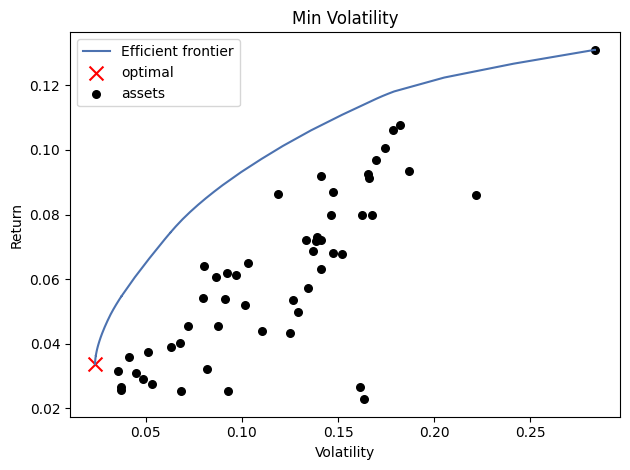

In [377]:
from pypfopt import CLA, plotting
fig, ax = plt.subplots()

cla = CLA(mu, S)
# cla.max_sharpe()
cla.min_volatility()
plt.title('Min Volatility')
# plt.title('Max Sharpe')

cla.portfolio_performance(verbose=True);
ax = plotting.plot_efficient_frontier(cla, showfig=False)
# plt.savefig("./data/plots/EF_all_max_sharpe.pdf")
plt.show()

In [378]:
# full_weights = pd.DataFrame(cla.weights,)
# full_weights.index = corr_ltr.index.values
full_weights = cla.weights

In [382]:
idx_nonz=np.where(full_weights>=0.01)
full_weights[idx_nonz]

array([0.0766341 , 0.17940122, 0.47478383, 0.01704628, 0.09223957,
       0.03966308, 0.09383174, 0.02640018])

In [386]:
(corr_ltr.index.values)[idx_nonz]

array(['U.S. Leveraged Loans hedged', 'World Government Bonds hedged',
       'World ex-Euro Government Bonds hedged', 'Japanese Equity hedged',
       'European Core Real Estate', 'Global Core Transport',
       'Macro Hedge Funds hedged', 'Commodities'], dtype=object)

In [390]:
for i in range(len(idx_nonz)):
    print((corr_ltr.index.values)[idx_nonz[i]])

['U.S. Leveraged Loans hedged' 'World Government Bonds hedged'
 'World ex-Euro Government Bonds hedged' 'Japanese Equity hedged'
 'European Core Real Estate' 'Global Core Transport'
 'Macro Hedge Funds hedged' 'Commodities']


In [423]:
a=2
b="v"
f"viens {a}-{b}"

'viens 2-v'

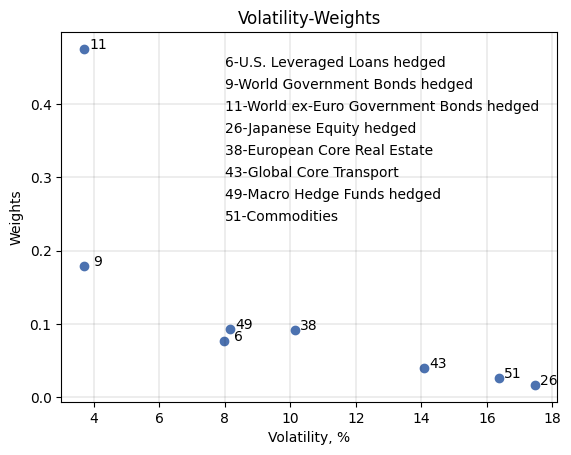

In [431]:
from pypfopt import CLA, plotting
fig, ax = plt.subplots()
volat_list = np.array(rire.loc[:,"Ann. volatility, %"])

plt.title('Volatility-Weights')
plt.xlabel('Volatility, %')
plt.ylabel('Weights')
plt.grid(color='k', linestyle='-', linewidth=0.1)
plt.scatter(volat_list[idx_nonz],full_weights[idx_nonz])
for i in range(len(idx_nonz[0])):
    idx = idx_nonz[0][i]
    crd=0.45-0.02*i
    label = (corr_ltr.index.values)[idx]
    plt.annotate(idx, # this is the text
                 (volat_list[idx],full_weights[idx]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,0.05), # distance from text to points (x,y)
                 ha='center')
    plt.text(8, 0.45-0.03*i,f"{idx}-{label}", ha='left')
   
# cla.portfolio_performance(verbose=True);
# ax = plotting.plot_efficient_frontier(cla, showfig=False)
plt.savefig("./data/plots/volatility_weights.pdf")
plt.show()

In [436]:
idx_nonz=np.where(full_weights>=0.01)[0]

In [460]:
mu_little=mu[idx_nonz]

In [461]:
S_little = S.iloc[idx_nonz,idx_nonz]

Expected annual return: 3.4%
Annual volatility: 2.4%
Sharpe Ratio: 0.58


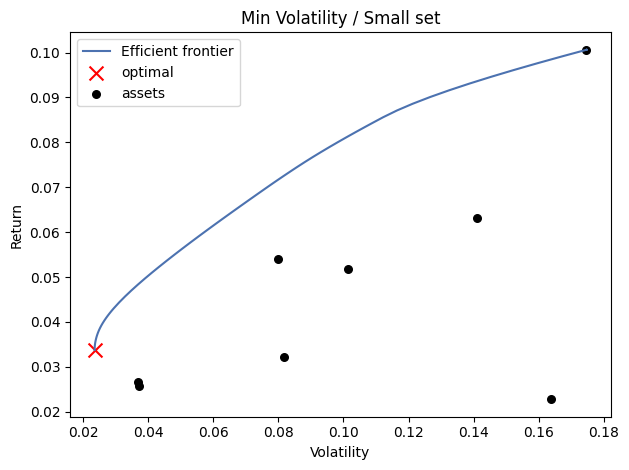

In [462]:
from pypfopt import CLA, plotting
fig, ax = plt.subplots()

clx = CLA(mu_little, S_little)
clx.min_volatility()
plt.title('Min Volatility / Small set')

clx.portfolio_performance(verbose=True);
ax = plotting.plot_efficient_frontier(clx, showfig=False)
# plt.savefig("./data/plots/EF_all_max_sharpe.pdf")
plt.show()

In [467]:
# Get all possible combinations
import itertools
combinations = list(itertools.combinations(idx_nonz, 4))

array([ 6,  9, 11, 49])

In [491]:
for icmb in combinations[:]:
    cmb = np.array(icmb)
    print(cmb)
    mu_cmb=mu[cmb]
    # print(mu_cmb)
    S_cmb = S.iloc[cmb,cmb]
    # print(S_cmb)
    # clx.clean_weights()
    clx = CLA(mu_cmb, S_cmb)
    clx.min_volatility()
    clx.portfolio_performance(verbose=True)

[ 6  9 11 26]
Expected annual return: 3.4%
Annual volatility: 2.9%
Sharpe Ratio: 0.49
[ 6  9 11 38]
Expected annual return: 3.3%
Annual volatility: 2.6%
Sharpe Ratio: 0.49
[ 6  9 11 43]
Expected annual return: 3.4%
Annual volatility: 2.9%
Sharpe Ratio: 0.49
[ 6  9 11 49]
Expected annual return: 3.2%
Annual volatility: 2.7%
Sharpe Ratio: 0.44
[ 6  9 11 51]
Expected annual return: 3.0%
Annual volatility: 2.7%
Sharpe Ratio: 0.37
[ 6  9 26 38]
Expected annual return: 3.3%
Annual volatility: 2.7%
Sharpe Ratio: 0.50
[ 6  9 26 43]
Expected annual return: 3.6%
Annual volatility: 2.9%
Sharpe Ratio: 0.55
[ 6  9 26 49]
Expected annual return: 3.3%
Annual volatility: 2.8%
Sharpe Ratio: 0.47
[ 6  9 26 51]
Expected annual return: 3.1%
Annual volatility: 2.7%
Sharpe Ratio: 0.41
[ 6  9 38 43]
Expected annual return: 3.4%
Annual volatility: 2.7%
Sharpe Ratio: 0.53
[ 6  9 38 49]
Expected annual return: 3.3%
Annual volatility: 2.5%
Sharpe Ratio: 0.50
[ 6  9 38 51]
Expected annual return: 3.1%
Annual vola

In [490]:
len(combinations)

70

In [ ]:
# 2.5 - [ 6  9 38 49] w 3.3; [ 6 11 38 51] w 3.3; 

In [497]:
cmb = np.array([6, 9, 38, 49])
mu_f=mu[cmb]
S_f = S.iloc[cmb,cmb]

clx = CLA(mu_f, S_f)
clx.min_volatility()
clx.portfolio_performance(verbose=True)


Expected annual return: 3.3%
Annual volatility: 2.5%
Sharpe Ratio: 0.50


array([0.06404344, 0.68055784, 0.14412741, 0.11127131])

In [496]:
# List of 4 assets
mu_f

U.S. Leveraged Loans hedged      0.0540
World Government Bonds hedged    0.0267
European Core Real Estate        0.0519
Macro Hedge Funds hedged         0.0322
Name: Arit. return 2023, %, dtype: float64

In [542]:
f_weights = clx.weights
f_weights*100

array([ 6.40434406, 68.05578405, 14.41274099, 11.1271309 ])

In [502]:
import yfinance as yf

In [604]:
tickers = ["1677.T","BKLN","HDG","VNQI"]

In [633]:
ohlc = yf.download(tickers, start="2022-08-31", end=dt.date.today())['Close']

[*********************100%%**********************]  4 of 4 completed


In [634]:
ohlc

,1677.T,BKLN,HDG,VNQI
Date,,,,
2022-08-31,51680.0,20.969999,46.970001,43.349998
2022-09-01,51730.0,20.850000,46.619999,42.759998
2022-09-02,51940.0,20.850000,46.520000,42.570000
2022-09-05,52060.0,NaN,NaN,NaN
2022-09-06,52100.0,20.799999,46.480000,42.320000
...,...,...,...,...
2023-08-24,52500.0,20.930000,48.169998,39.590000
2023-08-25,52660.0,20.969999,48.220001,39.779999
2023-08-28,52710.0,21.020000,48.330002,40.070000


In [635]:
returns = ohlc.pct_change().dropna()
returns.head()

,1677.T,BKLN,HDG,VNQI
Date,,,,
2022-09-01,0.000967,-0.005722,-0.007452,-0.013610
2022-09-02,0.004060,0.000000,-0.002145,-0.004443
2022-09-05,0.002310,0.000000,0.000000,0.000000
2022-09-06,0.000768,-0.002398,-0.000860,-0.005873
2022-09-07,0.014203,0.003846,0.004948,0.007798


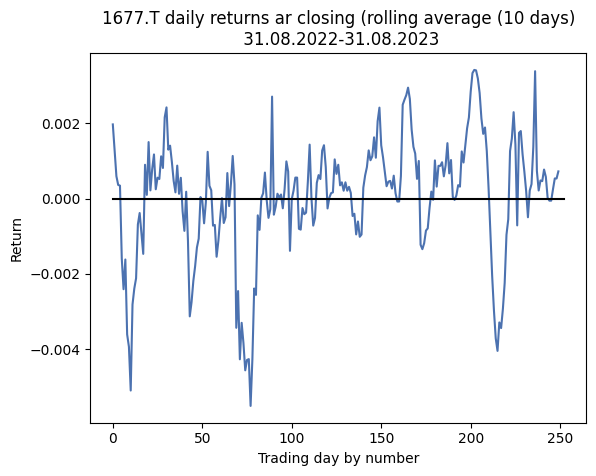

In [589]:
fig, ax = plt.subplots()
plt.plot(np.convolve(np.array(returns["1677.T"]), np.ones(10), 'valid') / 10)
plt.plot([0,252],[0,0],c='k')
plt.title('1677.T daily returns ar closing (rolling average (10 days)\n 31.08.2022-31.08.2023')
plt.xlabel('Trading day by number')
plt.ylabel('Return')
plt.savefig("./data/plots/1677T_timeseries.pdf")
plt.show()

In [636]:
# Generate Var-Cov matrix
cov_matrix = returns.cov()
cov_matrix

,1677.T,BKLN,HDG,VNQI
1677.T,0.000038,0.000004,0.000002,0.000002
BKLN,0.000004,0.000015,0.000012,0.000024
HDG,0.000002,0.000012,0.000026,0.000039
VNQI,0.000002,0.000024,0.000039,0.000129


In [639]:
# Calculate mean returns for each stock
avg_rets = returns.mean()
print(avg_rets)

# Calculate mean
port_mean = avg_rets.dot(f_weights)
print(port_mean*100)

# Calculate portfolio standard deviation
port_stdev = np.sqrt(f_weights.T.dot(cov_matrix).dot(f_weights))
print(port_stdev*100)

# Calculate mean of investment
mean_investment = port_mean#(1+port_mean)# * initial_investment

# Calculate standard deviation of investmnet
stdev_investment = port_stdev# initial_investment * port_stdev

1677.T    0.000112
BKLN      0.000026
HDG       0.000130
VNQI     -0.000179
dtype: float64
0.002362659490178086
0.4108201865450561


In [649]:
# Select our confidence interval (choose 99% here)
conf_level1 = 0.01

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Feed in the mean, standard deviation of our portfolio
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment, stdev_investment)

In [650]:
cutoff1*100

-0.9533480080919747

In [655]:
#Finally, we can calculate the VaR at our confidence interval
var_1d1 = cutoff1 #initial_investment
var_1d1*100

#output
#22347.7792230231

-0.9533480080919747

In [701]:
ohlc_month = yf.download(tickers, period="max")['Close']

[*********************100%%**********************]  4 of 4 completed


In [708]:
returns_month = ohlc_month.pct_change(periods=2, freq = '1y')#.dropna()

In [709]:
returns_month.head()

,1677.T,BKLN,HDG,VNQI
Date,,,,
2009-09-24,NaN,NaN,NaN,NaN
2009-09-25,NaN,NaN,NaN,NaN
2009-09-28,NaN,NaN,NaN,NaN
2009-09-29,NaN,NaN,NaN,NaN
2009-09-30,NaN,NaN,NaN,NaN


In [710]:
# Generate Var-Cov matrix
cov_matrix_month = returns_month.cov()
cov_matrix_month

,1677.T,BKLN,HDG,VNQI
1677.T,0.029023,0.003142,0.001755,0.009743
BKLN,0.003142,0.002404,0.001863,0.004148
HDG,0.001755,0.001863,0.003302,0.000469
VNQI,0.009743,0.004148,0.000469,0.015571


In [716]:
# Calculate mean returns for each stock
avg_rets_month = returns_month.mean()
print(avg_rets_month)

# Calculate mean
port_mean_month = avg_rets_month.dot(f_weights)
print(port_mean_month*100)

# Calculate portfolio standard deviation
port_stdev_month = np.sqrt(f_weights.T.dot(cov_matrix_month).dot(f_weights))
print(port_stdev_month*100)

# Calculate mean of investment
mean_investment_month = port_mean_month#(1+port_mean)# * initial_investment

# Calculate standard deviation of investmnet
stdev_investment_month = port_stdev_month# initial_investment * port_stdev

1677.T    0.072375
BKLN     -0.026427
HDG       0.062178
VNQI      0.035363
dtype: float64
-0.045316091720823834
5.429001024985733


In [717]:
# Select our confidence interval (choose 99% here)
conf_level1 = 0.01

# Using SciPy ppf method to generate values for the
# inverse cumulative distribution function to a normal distribution
# Feed in the mean, standard deviation of our portfolio
from scipy.stats import norm
cutoff1 = norm.ppf(conf_level1, mean_investment_month, stdev_investment_month)

In [718]:
cutoff1*100

-12.675061084361927

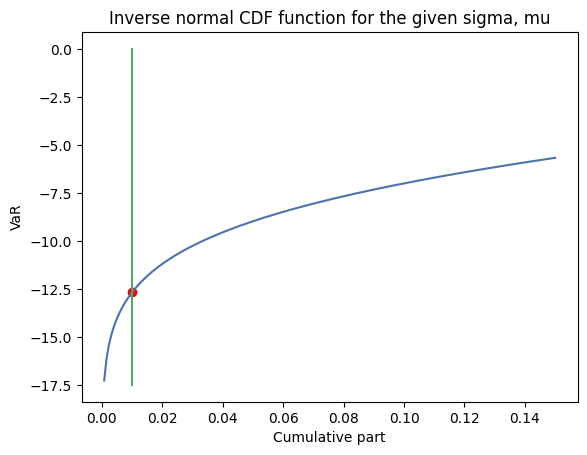

In [748]:
from scipy import stats
# x = np.linspace(-20,20,200)
x = np.linspace(0,0.15,200)
plt.plot(x,stats.norm.ppf(x, mean_investment_month*100, port_stdev_month*100))
plt.plot([0.01,0.01],[-17.5,0])
plt.scatter([0.01],[cutoff1*100],c='r')
plt.title('Inverse normal CDF function for the given sigma, mu')
plt.xlabel('Cumulative part')
plt.ylabel('VaR')
plt.savefig("./data/plots/inv_ppf_estimate.pdf")
plt.show()

1 day VaR @ 99% confidence: 1.13
2 day VaR @ 99% confidence: 1.59
3 day VaR @ 99% confidence: 1.95
4 day VaR @ 99% confidence: 2.25
5 day VaR @ 99% confidence: 2.52
6 day VaR @ 99% confidence: 2.76
7 day VaR @ 99% confidence: 2.98
8 day VaR @ 99% confidence: 3.19
9 day VaR @ 99% confidence: 3.38
10 day VaR @ 99% confidence: 3.56
11 day VaR @ 99% confidence: 3.74
12 day VaR @ 99% confidence: 3.9


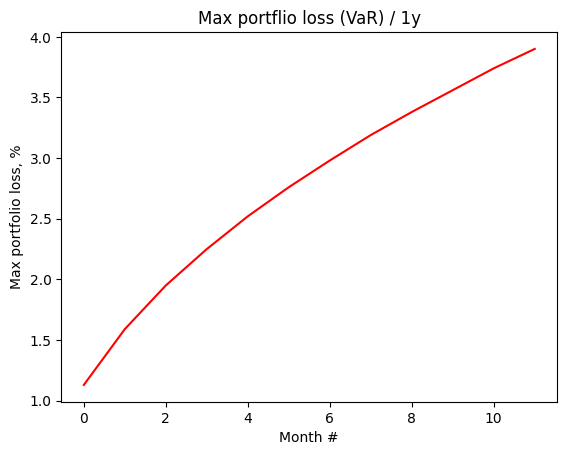

In [719]:
# Calculate n month VaR. Just Tests below
var_1d1 = 1-cutoff1
var_array = []
num_days = int(12)
for x in range(1, num_days+1):    
    var_array.append(np.round(var_1d1 * np.sqrt(x),2))
    print(str(x) + " day VaR @ 99% confidence: " + str(np.round(var_1d1 * np.sqrt(x),2)))

# Build plot
plt.xlabel("Month #")
plt.ylabel("Max portfolio loss, %")
plt.title("Max portflio loss (VaR) / 1y")
plt.plot(var_array, "r")